# Part 3: FULL BAYESIAN + PREDICTIVE DISTRIBUTION

Write a program in python to implement the full Bayesian inference on Gaussian variables for curve fitting problem. Follow the instructions below:

1. Generate 50 2D-data points using the following function: y = sin(x<sup>2</sup>+1) . Add Gaussian random noise to the data. Show the original curve line and the noisy data.

In [1]:
import numpy as np
def syntenic_data():
    x = np.linspace(0, 1, 50)
    y = np.sin(x ** 2 + 1)
    return x, y
x,y = syntenic_data()

def add_noise(y, mean, std, N):
    noise_data = y + np.random.normal(mean,std,N)
    return noise_data

mean_data, sigma_data = 0, 0.04
noise_y = add_noise(y, mean_data, sigma_data, 50)


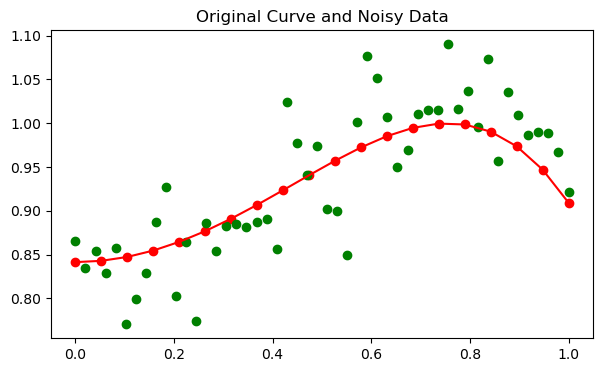

In [2]:
import matplotlib.pyplot as plt

curve_x = np.linspace(0, 1, 20)
curve_y = np.sin(curve_x ** 2 + 1)

plt.figure(figsize=(7,4))
plt.scatter(curve_x, curve_y, color='red')
plt.plot(curve_x, curve_y, color='red')
plt.scatter(x, noise_y, color='green')
plt.title('Original Curve and Noisy Data')
plt.show()

2. Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.

In [3]:
class FullBayesian():
    def __init__(self, M, alpha, beta, Mu, s):
        self.w = None
        self.alpha = alpha
        self.beta = beta
        self.M = M
        self.s = s
        self.Mu = Mu
        self.SS_n = None

    def fit(self, x, t):
        Phi = self.FB_Gaussain(x)
        I = np.identity(self.M)
        self.SS_n = np.linalg.inv(self.alpha * I + self.beta * Phi.T @ Phi)
        self.w = self.beta * self.SS_n @ Phi.T @ t

    def FB_Gaussain(self, x):
        N = len(x)
        Phi = np.ones((N, self.M))
        for n in range(N):
            for m in range(1, self.M):
                Phi[n][m] = np.exp((-(x[n]-self.Mu[m])**2) / (2*self.s**2))     # Gaussian formula
        return Phi
        
    def predict(self, x):
        Phi = self.FB_Gaussain(x)
        y_predict = Phi @ self.w
        
        return y_predict
    
    def compute_SS_new(self, x):
        Phi = self.FB_Gaussain(x)
        SS_new = 1/self.beta * np.identity(Phi.shape[0]) + Phi @ self.SS_n @ Phi.T
        return SS_new

In [4]:
class FB_plotter():
    def __init__(self, curve_x, curve_y, x, noise_y):
        self.curve_x = curve_x
        self.curve_y = curve_y
        self.x = x
        self.noise_y = noise_y
    
    def FB_show(self, y_predict, M = None, alpha=None, beta=None):
        plt.figure(figsize=(5,3))
        plt.scatter(self.curve_x, self.curve_y, color='red')
        plt.plot(self.curve_x, self.curve_y, color='red')
        plt.scatter(self.x, self.noise_y, color='green')
        plt.plot(x, y_predict, color='blue')

        title_parts = []
        if M:
            title_parts.append(f'M={M}')
        if alpha:
            title_parts.append(f'alpha={alpha}')

        if beta:
            title_parts.append(f'beta={beta}')
        title = ','.join(title_parts)
        
        plt.title(title)
        plt.show()



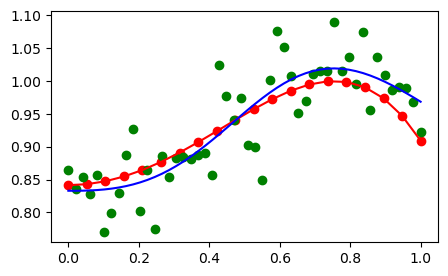

w: [ 0.83836795 -0.02388489  0.15425145  0.06737073]


In [5]:
M=4
alpha = 0.02
beta = 1
Mu = np.linspace(0, 1, M)
s = 1/M
model = FullBayesian(M, alpha, beta, Mu, s)
model.fit(x, noise_y)
y_predict = model.predict(x)

plotter = FB_plotter(curve_x, curve_y, x, noise_y)
plotter.FB_show(y_predict)
print('w:', model.w)

3. Experiment with your code by changing alpha and beta. Discuss the meaning of them with respect to the curve fitting results.

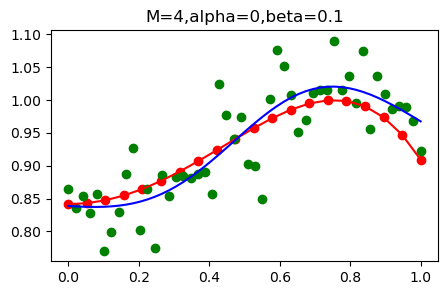

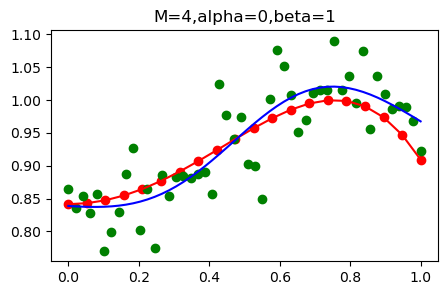

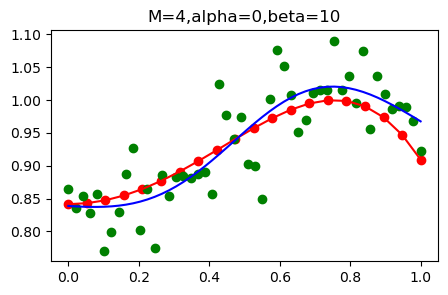

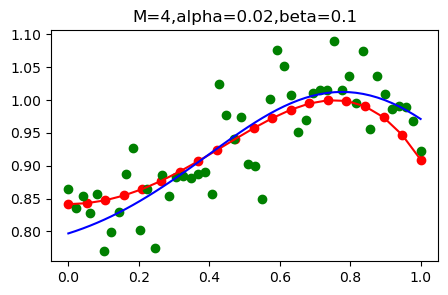

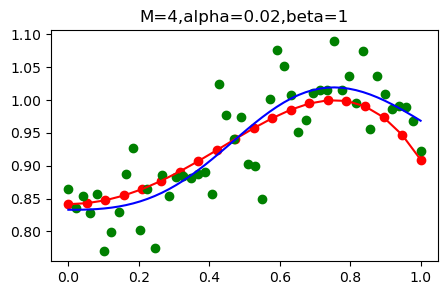

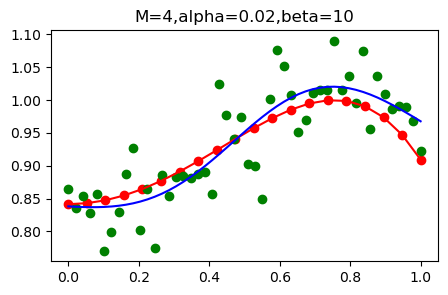

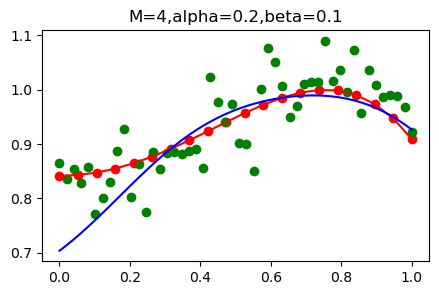

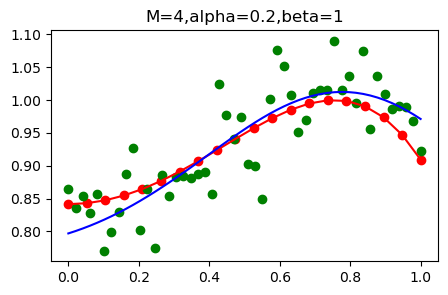

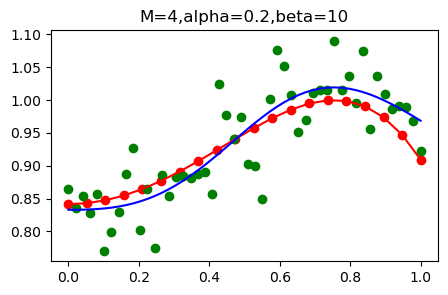

In [8]:
M = 4
Mu = np.linspace(0, 1, M)
s = 1/M
for alpha in [0, 0.02, 0.2]:
    for beta in [0.1, 1, 10]:
        model = FullBayesian(M, alpha, beta, Mu, s)
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        plotter.FB_show(y_predict=y_predict,M=M, alpha=str(alpha), beta=beta)


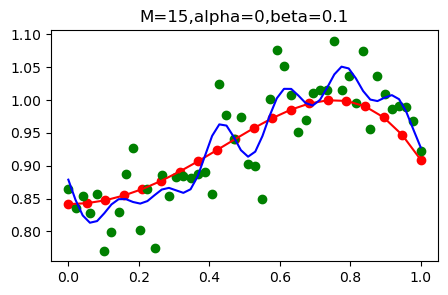

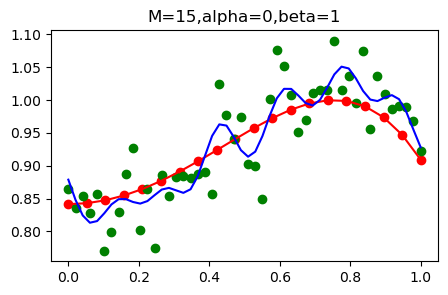

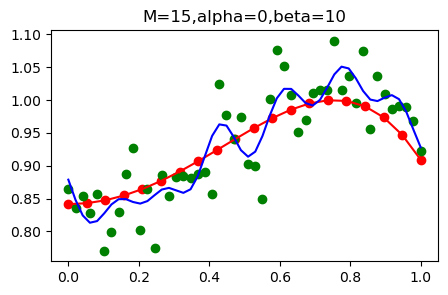

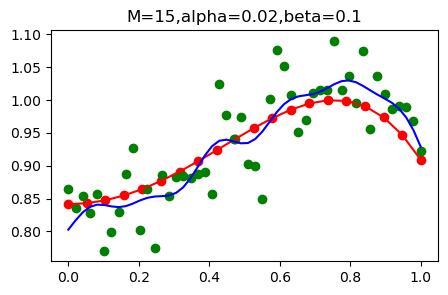

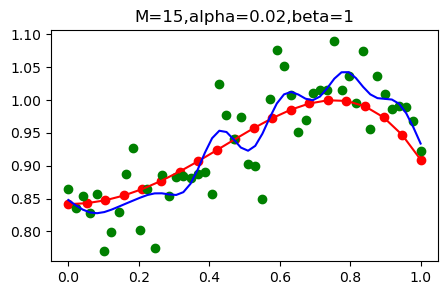

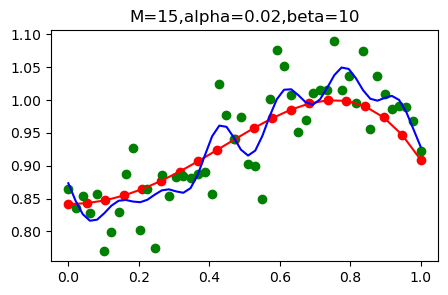

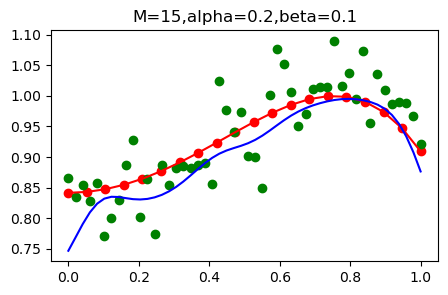

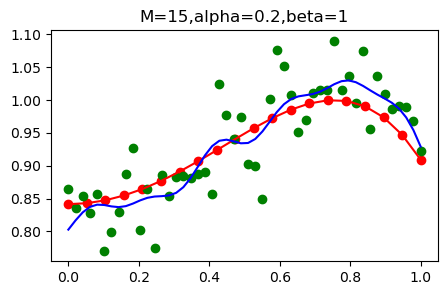

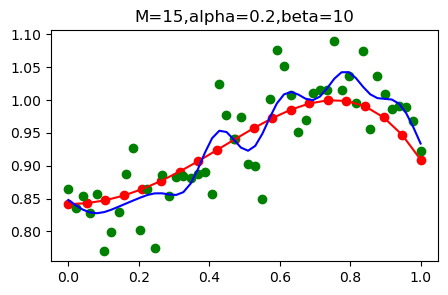

In [7]:
M = 15
Mu = np.linspace(0, 1, M)
s = 1/M
for alpha in [0, 0.02, 0.2]:
    for beta in [0.1, 1, 10]:
        model = FullBayesian(M, alpha, beta, Mu, s)
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        plotter.FB_show(y_predict=y_predict,M=M, alpha=str(alpha), beta=beta)

- Alpha:
  - Alpha is referred to as the precision parameter for the prior distribution over the model parameters (weights, w). It controls the smoothness or complexity of the fitted curve. Smaller values of α allow the model to have more complex and flexible shapes, which can lead to overfitting. In contrast, larger values of α impose stronger regularization, leading to simpler and smoother curves. It helps prevent overfitting by discouraging the model from fitting the noise in the data.
  - The alpha value can measure the degree of proximity between the predicted values and the actual values, with smaller alpha values indicating a closer match.
  - So using alpha can ease the overfitting problem to some degree. 
  - For example, when M = 15, alpha = 0, it occurs an overfitting problem. When set alpha = 0.2, the overfitting problem has been alleviated.

- Beta:
  - Beta represents the precision (inverse of variance) of the Gaussian noise assumed in the likelihood function. It reflects the level of uncertainty or noise in the observed data. 
  - When beta is small (high noise assumed), the model is more influenced by the noise in the data. This can lead to overfitting, as the model tries to fit the noise. In contrast, when beta is large (low noise assumed), the model is less influenced by the noise and focuses more on capturing the underlying patterns in the data.
  - For example, when M =15, alpha = 0.2, When beta=1, overfitting is not as pronounced, and when beta=10, overfitting becomes more pronounced.

4. Show your best fitting, similar to:

In [9]:
def evaluate(y, y_predict):
    error = 0
    for i in range(len(y)):
        error += abs(y_predict[i] - y[i])
    return error


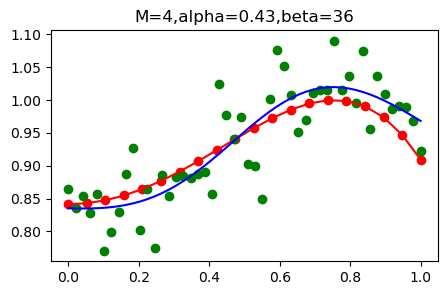

In [10]:
# After trying different values of M, I chose M=4 to avoid overfitting
M = 4   
Alpha = np.arange(0.1, 0.5, 0.01)
Beta = np.arange(1, 50, 1)

Mu = np.linspace(0, 1, M)
s = 1/M

error = 0
min_error = 0
initial = True
alpha_best = 0
beta_best = 0
M_best = M

for alpha in Alpha:
    for beta in Beta:
        model = FullBayesian(M, alpha, beta, Mu, s)
        model.fit(x, noise_y)
        y_predict = model.predict(x)
        error = evaluate(noise_y,y_predict)
        if initial:
            min_error = error
            alpha_best = alpha
            beta_best = beta
            initial = False
        if error < min_error:
            min_error = error
            alpha_best = alpha
            beta_best = beta

model_best = FullBayesian(M_best, alpha_best, beta_best, Mu, s)
model_best.fit(x, noise_y)
y_predict = model_best.predict(x)

plotter = FB_plotter(curve_x, curve_y, x, noise_y)
plotter.FB_show(y_predict, M=M_best,alpha=round(alpha_best,2), beta=beta_best)


5. Explain how useful p(w|t) for the training and testing stages.

- Training stage:
  - p(w|t) is used to estimate the model's parameters w. It provides the probability distribution of w given the observed data t. 
  - p(w|t) also provides information about the uncertainty in parameter estimation. 

- Testing stage:
  - p(w|t) can be used to predict the values of new, unseen data points. This approach provides not only point estimates of predictions but also prediction uncertainties, aiding in quantifying the confidence in predictions.
  - p(w|t) can also be used to prevent overfitting. 

6. Generate 50 2D-data points using the following function: y = sin(x<sup>2</sup>+1). Add Gaussian random noise to the data. Show the original curve line and the noisy data

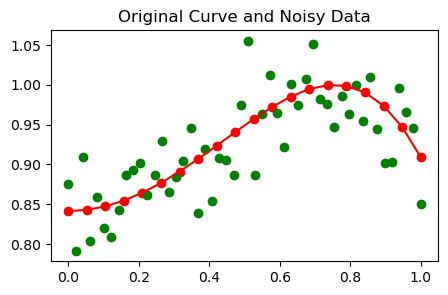

In [11]:
x,y = syntenic_data()
mean_data, sigma_data = 0, 0.04
noise_y = add_noise(y, mean_data, sigma_data, 50)
plt.figure(figsize=(5,3))
plt.scatter(curve_x, curve_y, color='red')
plt.plot(curve_x, curve_y, color='red')
plt.scatter(x, noise_y, color='green')
plt.title('Original Curve and Noisy Data')
plt.show()

7. Compute the predictive distribution of every input data sequentially, where each input data is taken randomly from the noise data. Show your best prediction results for all 50 data one by one:

In [12]:
indices = list(range(50))
np.random.shuffle(indices)
print(indices)



[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40, 25, 20, 15, 0]


[29]
[0.5918367346938775]


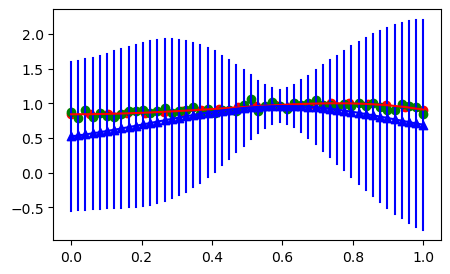

[29, 9]
[0.5918367346938775, 0.18367346938775508]


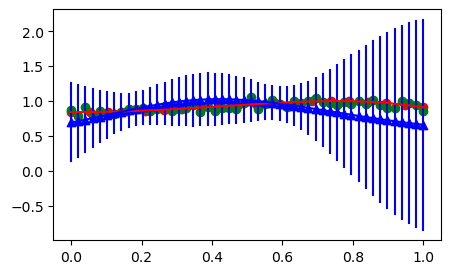

[29, 9, 13]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955]


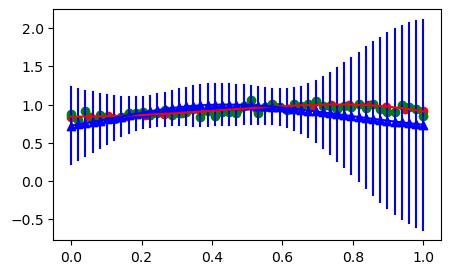

[29, 9, 13, 28]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714]


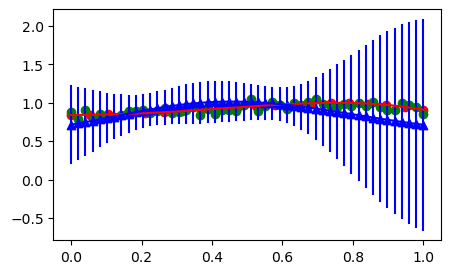

[29, 9, 13, 28, 32]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959]


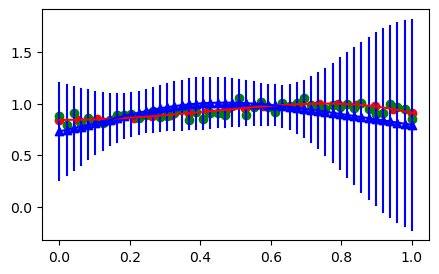

[29, 9, 13, 28, 32, 19]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163]


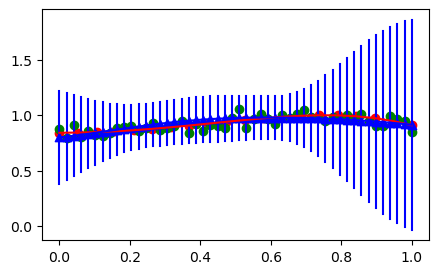

[29, 9, 13, 28, 32, 19, 17]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041]


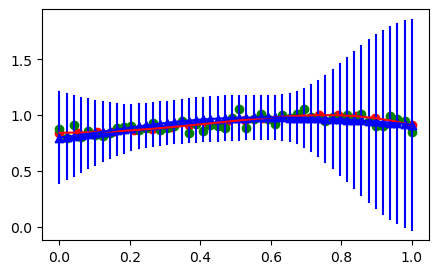

[29, 9, 13, 28, 32, 19, 17, 23]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408]


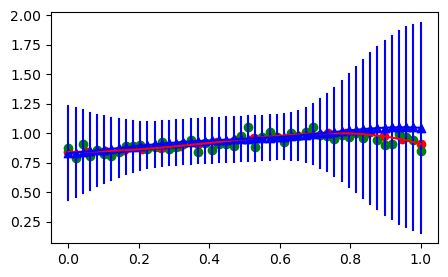

[29, 9, 13, 28, 32, 19, 17, 23, 44]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693]


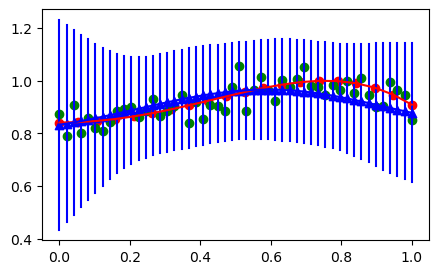

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793]


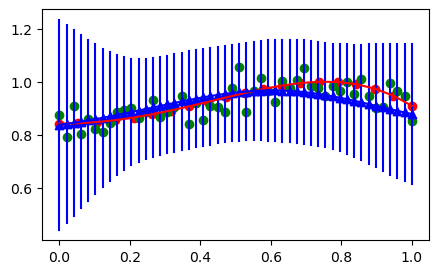

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203]


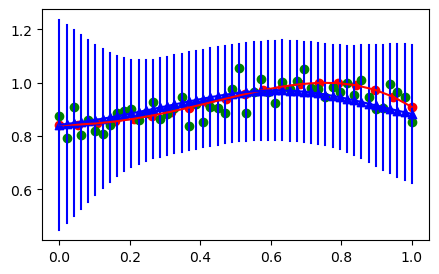

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673]


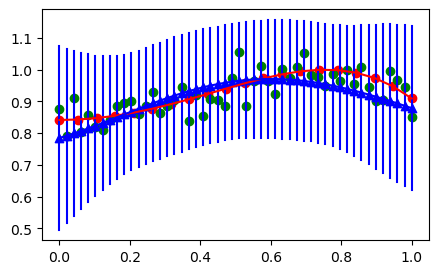

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464]


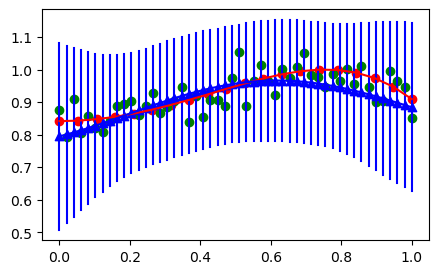

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448]


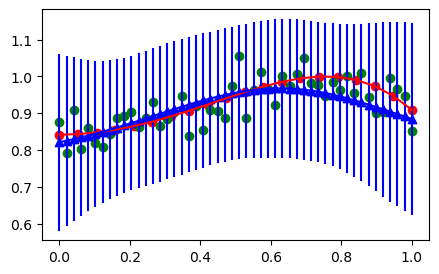

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571]


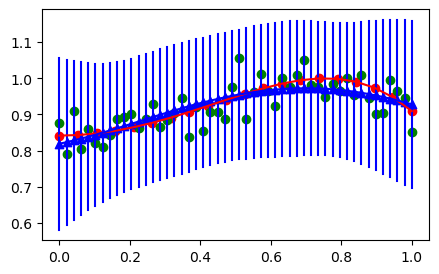

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469]


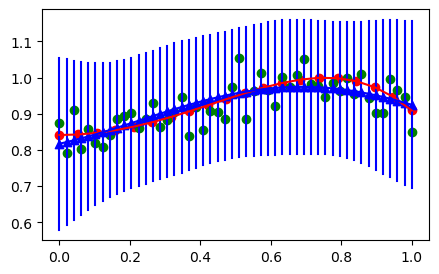

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082]


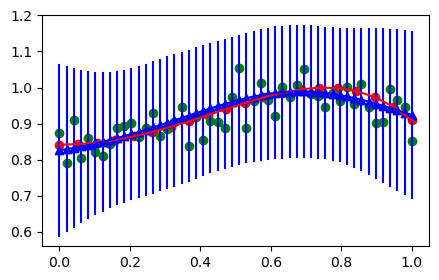

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754]


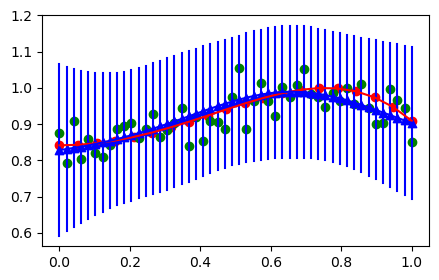

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102]


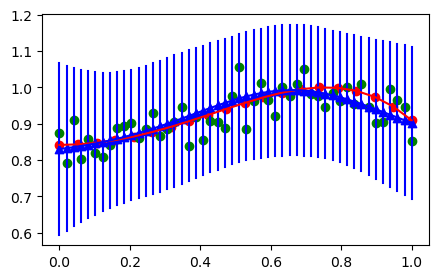

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732]


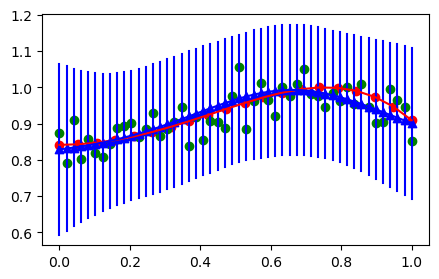

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632]


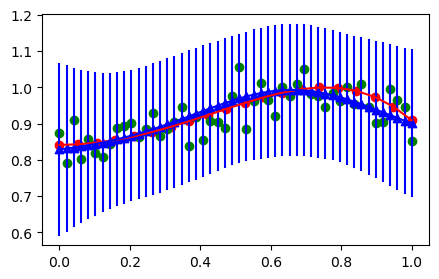

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285]


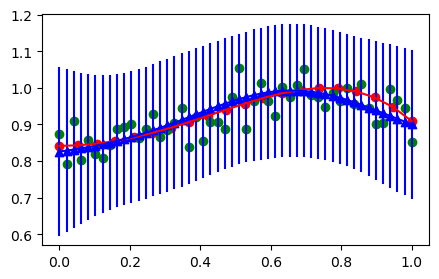

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591]


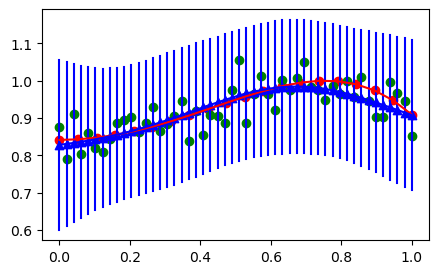

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612]


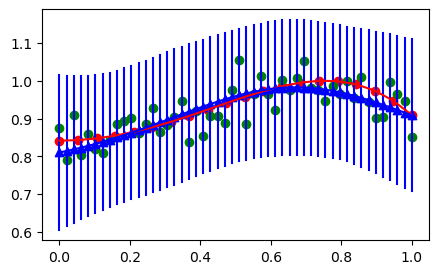

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897]


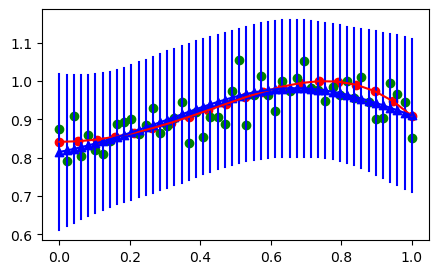

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306]


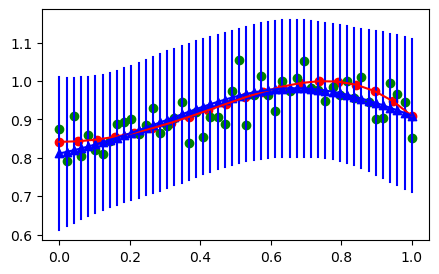

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836]


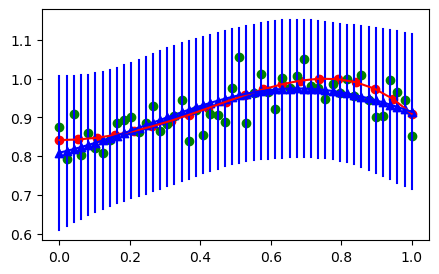

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0]


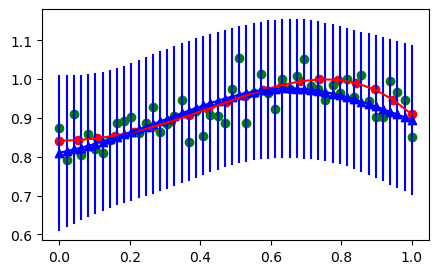

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366]


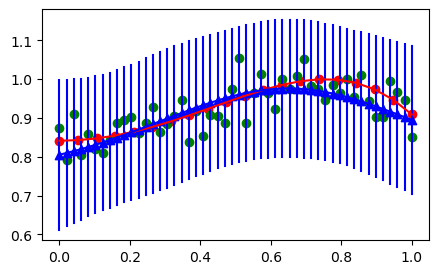

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346]


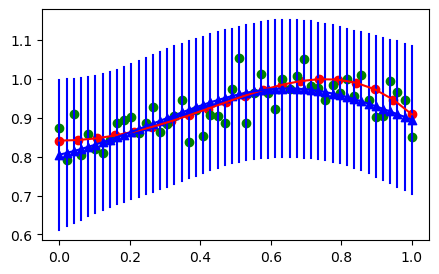

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877]


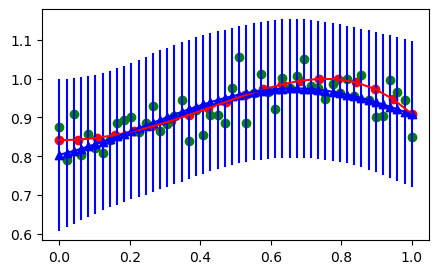

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017]


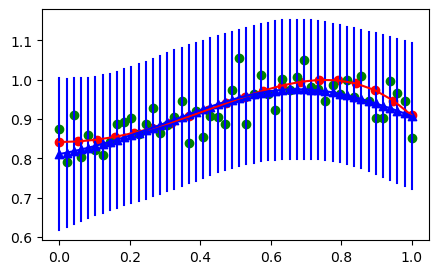

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387]


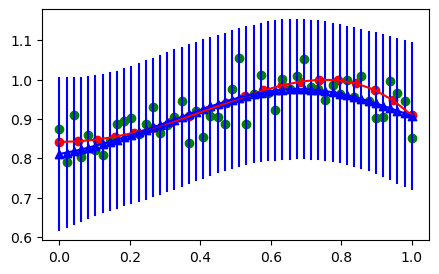

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224]


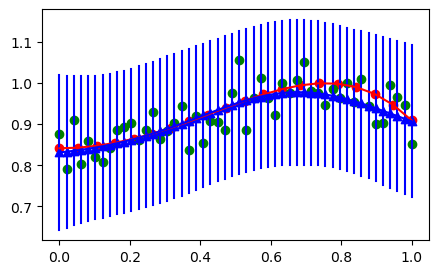

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857]


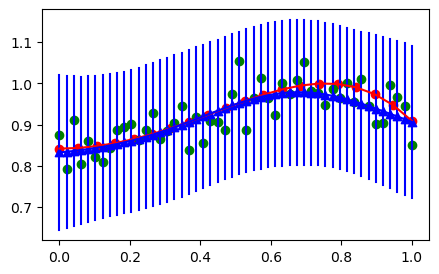

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897]


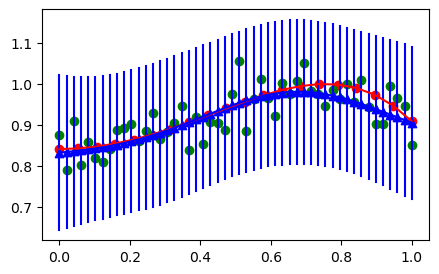

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816]


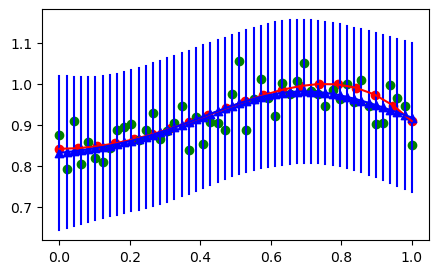

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265]


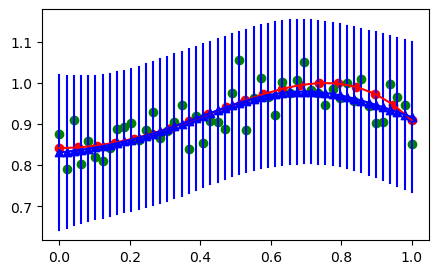

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855]


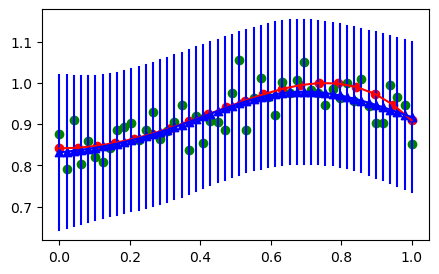

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612]


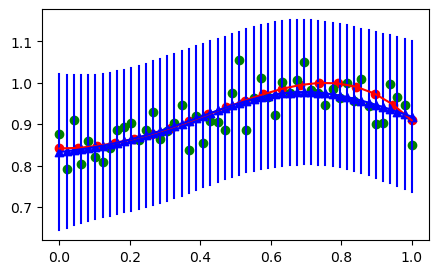

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326]


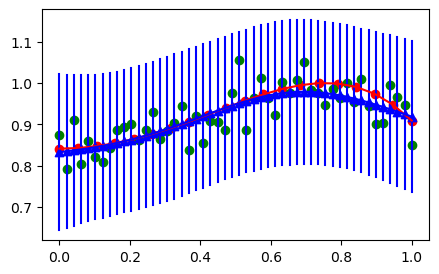

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326, 0.7142857142857142]

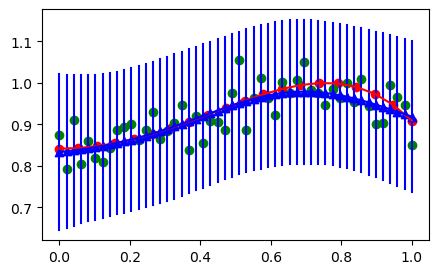

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326, 0.7142857142857

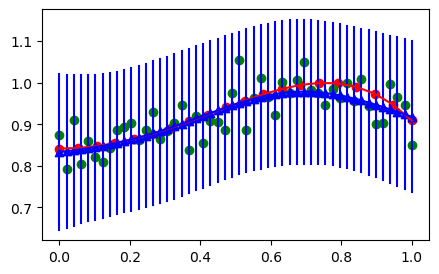

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326, 0.714285714

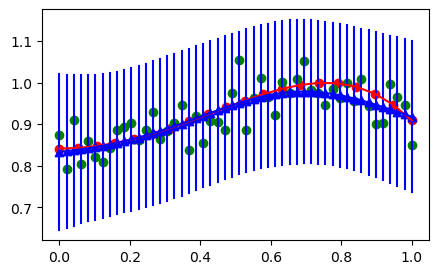

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326, 0.71428

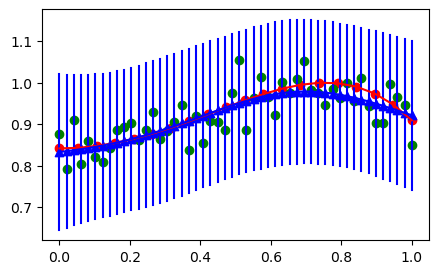

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326, 0.7

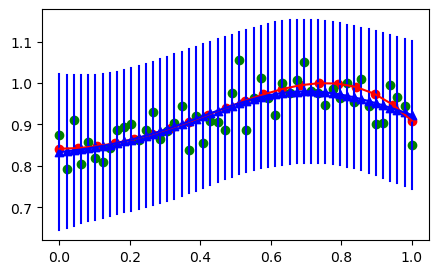

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40, 25]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816326,

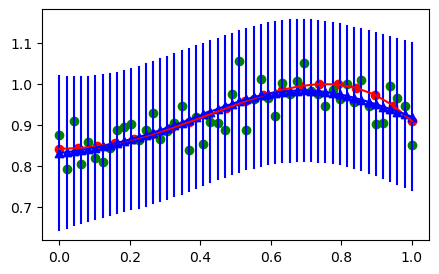

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40, 25, 20]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.7755102040816

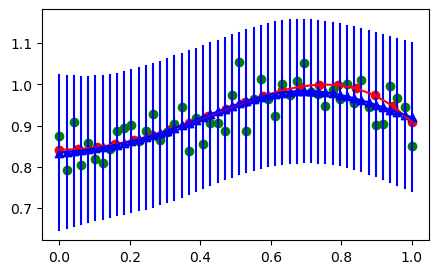

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40, 25, 20, 15]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.775510204

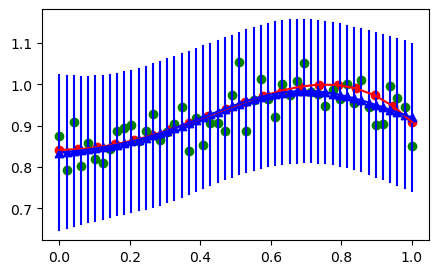

[29, 9, 13, 28, 32, 19, 17, 23, 44, 16, 36, 6, 22, 4, 42, 24, 34, 45, 33, 11, 43, 7, 26, 1, 8, 5, 30, 49, 3, 12, 47, 18, 39, 2, 14, 31, 46, 37, 21, 10, 38, 35, 41, 27, 48, 40, 25, 20, 15, 0]
[0.5918367346938775, 0.18367346938775508, 0.26530612244897955, 0.5714285714285714, 0.6530612244897959, 0.3877551020408163, 0.3469387755102041, 0.4693877551020408, 0.8979591836734693, 0.32653061224489793, 0.7346938775510203, 0.12244897959183673, 0.44897959183673464, 0.08163265306122448, 0.8571428571428571, 0.4897959183673469, 0.6938775510204082, 0.9183673469387754, 0.673469387755102, 0.22448979591836732, 0.8775510204081632, 0.14285714285714285, 0.5306122448979591, 0.02040816326530612, 0.16326530612244897, 0.1020408163265306, 0.6122448979591836, 1.0, 0.061224489795918366, 0.24489795918367346, 0.9591836734693877, 0.36734693877551017, 0.7959183673469387, 0.04081632653061224, 0.2857142857142857, 0.6326530612244897, 0.9387755102040816, 0.7551020408163265, 0.42857142857142855, 0.2040816326530612, 0.775510

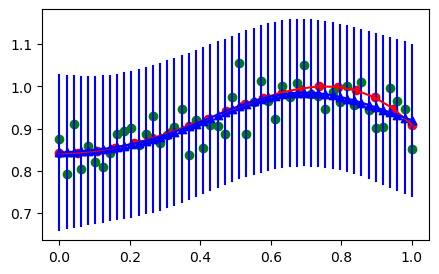

In [13]:
x_list = []
y_list = []
for i in range(50):
     x_list.append(x[indices[i]])
     y_list.append(noise_y[indices[i]])
     print(indices[:i+1])
     print(x_list)
     model = FullBayesian(M_best, alpha_best, beta_best, Mu, s)
     model.fit(x_list, y_list)
     y_predict = model.predict(x)

     SS_new = model.compute_SS_new(x)
     std = np.sqrt(SS_new.diagonal())

     plt.figure(figsize=(5,3))
     for i in range(len(x)):
          plt.plot([x[i],x[i]], [y_predict[i]-std[i], y_predict[i]+std[i]], color='blue')
     plt.scatter(curve_x, curve_y, color='red')
     plt.plot(curve_x, curve_y, color='red')
     plt.scatter(x, noise_y, color='green')
     plt.plot(x, y_predict, color = 'blue')
     plt.scatter(x, y_predict, color='blue', marker = '^')
     plt.show()

8. Explain why the predictive distribution is better than the original form of the full Bayesian inference.

- The predictive distribution takes into account both the model's uncertainty (captured by p(w|t)) and the uncertainty in the data (captured by the likelihood). 
- The predictive distribution is well-suited for generalization to new, unseen data. It quantifies the uncertainty associated with predictions, allowing for more cautious and reliable predictions in situations where the model has not been explicitly trained on the specific data points.

9. Discuss the differences between p(t_new|t) and p(w|t).

- Different Targets
  - p(t_new|t): It focuses on predicting new data points, t_new, while considering the observed data, t.
  - p(w|t): It is concerned with estimating the posterior distribution of model parameters, w, taking into account the observed data, t.
- Different Outputs
  - p(t_new|t): The output of p(t_new|t) is the predictive distribution for new data points, t_new. It provides information about how to predict the distribution of new data points and quantify prediction uncertainty.
  - p(w|t): The output of p(w|t) is the posterior distribution of model parameters, w. It offers insights into the likelihood of different parameter values given the observed data and characterizes parameter uncertainty.
- Different Applications
  - p(t_new|t): It's main application lies in prediction and evaluating the predictive performance of the model. 
  - p(w|t): It is primarily used for model parameter estimation, model selection, and mitigating overfitting during the training stage.